## Sales Data Exploration

In [4]:
#Importing the Libraries


#for data manipulation
import pandas as pd

#for numerical computing 
import numpy as np

#for scientific and technical computing
import scipy

#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df =pd.read_csv("C:/Users/HP/Downloads/sales_2024.csv")
df.columns

Index(['Order ID', 'Customer ID', 'SalesPerson', 'Order Date',
       'Order Priority', 'SKU', 'Order Quantity', 'Unit Sell Price',
       'Discount', 'Shipping Amount', 'Ship Mode', 'Product Container',
       'Ship Date'],
      dtype='object')

In [8]:
df.head()

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date
0,29030,C660,Richard,1/01/2024,Medium,SKU814,10,19.84,0.05,4.10,Regular Air,Wrap Bag,2/01/2024
1,47591,C198,Bob,1/01/2024,Critical,SKU957,27,10.48,0.10,6.91,Regular Air,Small Box,2/01/2024
2,54214,C628,Bob,1/01/2024,Medium,SKU1076,38,199.99,0.04,24.49,Express Air,Large Box,4/01/2024
3,10945,C623,Bob,2/01/2024,Medium,SKU1158,14,95.99,0.04,8.99,Regular Air,Small Box,4/01/2024
4,50471,C219,Bob,2/01/2024,Low,SKU059,25,226.67,0.02,28.16,Delivery Truck,Jumbo Drum,4/01/2024


In [12]:
df['Revenue'] = df['Order Quantity'] * df['Unit Sell Price']
df.head()

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Revenue
0,29030,C660,Richard,1/01/2024,Medium,SKU814,10,19.84,0.05,4.10,Regular Air,Wrap Bag,2/01/2024,198.40
1,47591,C198,Bob,1/01/2024,Critical,SKU957,27,10.48,0.10,6.91,Regular Air,Small Box,2/01/2024,282.96
2,54214,C628,Bob,1/01/2024,Medium,SKU1076,38,199.99,0.04,24.49,Express Air,Large Box,4/01/2024,7599.62
3,10945,C623,Bob,2/01/2024,Medium,SKU1158,14,95.99,0.04,8.99,Regular Air,Small Box,4/01/2024,1343.86
4,50471,C219,Bob,2/01/2024,Low,SKU059,25,226.67,0.02,28.16,Delivery Truck,Jumbo Drum,4/01/2024,5666.75


In [14]:
df.describe()

,Order ID,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Revenue
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,30250.751905,25.882857,93.110729,0.049705,12.917910,1841.036429
std,17328.265127,14.667462,288.118447,0.032244,17.477776,3585.192902
min,6.000000,1.000000,0.990000,0.000000,0.490000,2.520000
25%,16101.750000,13.000000,6.480000,0.020000,2.997500,138.190000
50%,30052.500000,26.000000,21.520000,0.050000,6.160000,465.470000
75%,44679.000000,39.000000,85.990000,0.080000,13.990000,1890.600000
max,59969.000000,50.000000,6783.020000,0.250000,147.120000,54264.160000


In [16]:
df.shape

(2100, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           2100 non-null   int64  
 1   Customer ID        2100 non-null   object 
 2   SalesPerson        2100 non-null   object 
 3   Order Date         2100 non-null   object 
 4   Order Priority     2100 non-null   object 
 5   SKU                2100 non-null   object 
 6   Order Quantity     2100 non-null   int64  
 7   Unit Sell Price    2100 non-null   float64
 8   Discount           2100 non-null   float64
 9   Shipping Amount    2100 non-null   float64
 10  Ship Mode          2100 non-null   object 
 11  Product Container  2100 non-null   object 
 12  Ship Date          2100 non-null   object 
 13  Revenue            2100 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 229.8+ KB


In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')

In [32]:
reference_date = df['Order Date'].max()

In [34]:
df.nunique()

Order ID             1397
Customer ID           632
SalesPerson             3
Order Date            353
Order Priority          5
SKU                   958
Order Quantity         50
Unit Sell Price       607
Discount               12
Shipping Amount       520
Ship Mode               3
Product Container       7
Ship Date             360
Revenue              1912
dtype: int64

In [56]:
rfm_df = df.groupby('Customer ID').agg({
    'Order Date': lambda x : (reference_date - x.max()).days, 
    'Customer ID':'count', 
    'Revenue': 'sum'
    }).rename(columns={'Order Date' : 'Recency', 'Customer ID' : 'Frequency', 'Revenue': 'Monetary'}).reset_index()
print(rfm_df)

    Customer ID  Recency  Frequency  Monetary
0          C003      347          1     98.67
1          C004      324          2   5062.12
2          C005       29          8   9272.82
3          C007      216          1   1451.78
4          C008       24          2    437.33
..          ...      ...        ...       ...
627        C791       58          3   4408.17
628        C792       10          4   3754.13
629        C793      201          3   2648.32
630        C794      132          1    595.70
631        C795       73          3   3074.50

[632 rows x 4 columns]


In [58]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'],5,labels = [5,4,3,2,1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'),5, labels = [1,2,3,4,5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'],5,labels=[1,2,3,4,5])


In [60]:
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df['RFM_Score'] = rfm_df[['R_Score','F_Score','M_Score']].sum(axis =1)

print(rfm_df)

    Customer ID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0          C003      347          1     98.67       1       1       1   
1          C004      324          2   5062.12       1       2       3   
2          C005       29          8   9272.82       5       5       4   
3          C007      216          1   1451.78       2       1       2   
4          C008       24          2    437.33       5       2       1   
..          ...      ...        ...       ...     ...     ...     ...   
627        C791       58          3   4408.17       4       3       3   
628        C792       10          4   3754.13       5       4       3   
629        C793      201          3   2648.32       2       3       3   
630        C794      132          1    595.70       3       2       1   
631        C795       73          3   3074.50       4       3       3   

    RFM_Segment  RFM_Score  
0           111          3  
1           123          6  
2           554         14  
3      

In [66]:
# Define RFM segments
def rfm_segment(row):
    if row['R_Score'] == '5' and row['F_Score'] == '5' and row['M_Score'] == '5':
        return 'Champions'
    elif row['R_Score'] in ['4', '5'] and row['F_Score'] in ['4', '5']:
        return 'Loyal Customers'
    elif row['R_Score'] in ['3', '4', '5'] and row['F_Score'] in ['3', '4', '5']:
        return 'Potential Loyalists'
    elif row['R_Score'] in ['1', '2'] and row['F_Score'] in ['1', '2']:
        return 'At-Risk'
    else:
        return 'Others'

# Apply the function to create the segment column
rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

# Display the segmented RFM DataFrame
print(rfm_df[['Customer ID', 'RFM_Segment', 'RFM_Score', 'Segment']])

    Customer ID RFM_Segment  RFM_Score Segment
0          C003         111          3  Others
1          C004         123          6  Others
2          C005         554         14  Others
3          C007         212          5  Others
4          C008         521          8  Others
..          ...         ...        ...     ...
627        C791         433         10  Others
628        C792         543         12  Others
629        C793         233          8  Others
630        C794         321          6  Others
631        C795         433         10  Others

[632 rows x 4 columns]


In [74]:
print("Unique R_Score values:", rfm_df['R_Score'].unique())
print("Unique F_Score values:", rfm_df['F_Score'].unique())
print("Unique M_Score values:", rfm_df['M_Score'].unique())

Unique R_Score values: [1, 5, 2, 4, 3]
Categories (5, int64): [5 < 4 < 3 < 2 < 1]
Unique F_Score values: [1, 2, 5, 3, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
Unique M_Score values: [1, 3, 4, 2, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [76]:
def rfm_segment(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 2:
        return 'Potential Loyalists'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'At-Risk'
    elif row['M_Score'] >= 4:
        return 'Big Spenders'
    else:
        return 'Others'

# Apply the segmentation function
rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

In [78]:
# Re-check segment counts
print(rfm_df['Segment'].value_counts())

Segment
At-Risk                154
Loyal Customers        129
Others                 128
Champions               96
Potential Loyalists     67
Big Spenders            58
Name: count, dtype: int64


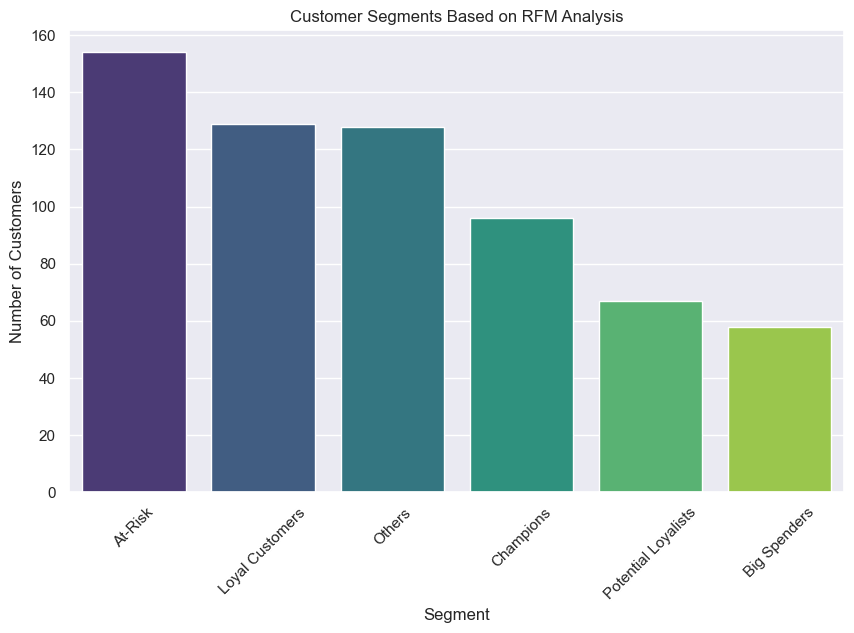

In [80]:
# Visualize with a bar chart
segment_counts = rfm_df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', data=segment_counts, palette='viridis')
plt.title('Customer Segments Based on RFM Analysis')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [85]:
# Filter for "At-Risk" customers
at_risk_customers = rfm_df[rfm_df['Segment'] == 'At-Risk']

# Display the list of "At-Risk" customers
print(at_risk_customers[['Customer ID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']])

    Customer ID  Recency  Frequency  Monetary R_Score F_Score M_Score
0          C003      347          1     98.67       1       1       1
1          C004      324          2   5062.12       1       2       3
3          C007      216          1   1451.78       2       1       2
7          C012      316          1    129.36       1       1       1
12         C017      304          2    525.72       1       2       1
..          ...      ...        ...       ...     ...     ...     ...
580        C734      197          1     48.40       2       2       1
590        C745      141          1    112.00       2       2       1
606        C767      283          1   1159.42       1       2       2
611        C772      286          1    117.60       1       2       1
622        C785      139          1    209.76       2       2       1

[154 rows x 7 columns]


In [87]:
# Save "At-Risk" customers to a CSV file
at_risk_customers.to_csv('at_risk_customers.csv', index=False)

Analysis Based on RFM Segments

Taking Action Based on RFM Segmentation
RFM analysis helps you create personalized marketing strategies:

Loyalty Programs: For Champions customers.
Re-engagement Campaigns: For at-risk customers.
Discounts or Promotions: For potential loyalists or new customers with promising recency and frequency scores.
Each segment’s characteristics help you decide which marketing tactics are most likely to increase engagement and spending.